# Image similarity

We'll need a way to keep track of how well our algorithm performs. To do that we'll need an image similirity coefficient.

In [2]:
import gym
from telesketch.envs.discrete_telesketch import DiscreteTelesketchEnv
import numpy as np
import cv2

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from skimage.metrics import normalized_root_mse
from skimage.metrics import hausdorff_distance
from skimage.feature import match_template

import matplotlib.pyplot as plt

In [3]:
# Ref canvas
ref_canvas = np.full((64, 64, 3), 255, dtype=np.uint8)
ref_canvas = cv2.line(ref_canvas, (0, 0), (32, 32), (0, 0, 0), 2)
ref_canvas = cv2.line(ref_canvas, (32, 32), (64, 32), (0, 0, 0), 2)
#ref_canvas = cv2.line(ref_canvas, (0, 125), (250, 125), (0, 0, 0), 5)

# Sim func
mse = lambda x, y: np.sum((x - y) ** 2)
mse = lambda x, y: np.sum((x - y) ** 2)

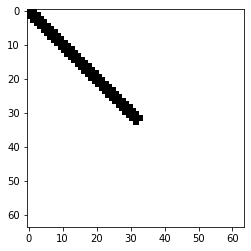

In [20]:
x = np.full((64, 64, 3), 255, dtype=np.uint8)
z = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY).astype(np.float32) / 255.0
y = cv2.line(z, (0, 0), (32, 32), (0, 0, 0), 2)

plt.imshow(y, cmap="gray")

In [58]:
z

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [61]:
q = (1, 2)

f"[{*q}]"

'(1, 2)'

In [36]:
np.finfo(np.float32).min
np.finfo(np.float32).max

3.4028235e+38

In [45]:
from gymnasium import spaces

x = spaces.Box(
    low=np.array([np.finfo(np.float32).min, 0]), 
    high=np.array([np.finfo(np.float32).max, 10]), 
    shape=(2,), 
    dtype=np.float32)

x.sample()

array([4.357372e+37, 7.114343e+00], dtype=float32)

In [57]:
y = spaces.Box(np.array((0, 0)), np.array((64, 64)), shape=(2,), dtype=np.int32)


y.

(2,)

In [68]:
# Ref canvas
IMG_SIZE = 64
PATCH_SIZE = 11
ref_canvas = np.full((IMG_SIZE, IMG_SIZE, 3), 255, dtype=np.uint8)
ref_canvas = cv2.line(ref_canvas, (0, 0), (32, 32), (0, 0, 0), 2)
ref_canvas = cv2.line(ref_canvas, (32, 32), (64, 32), (0, 0, 0), 2)

rmse = lambda x, y: np.sum((x - y) ** 2)
env = DiscreteTelesketchEnv(
    ref_canvas, 
    rmse,
    lambda sim: sim < 5,
    5, 2, 
    patch_size=(PATCH_SIZE, PATCH_SIZE), 
    render_mode="image"
)

env.reset();

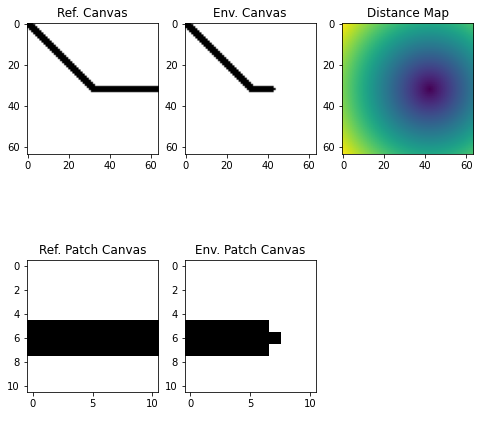

0.1270331784326304
0.9540682044427002
[[0.8624957]]
[[0.01600878]]
62.0
0.02587080046551521
0.21686105293279523
0.03128892636601511


In [78]:
x = env.step(0)
env.render()

ref = x[0]["ref"]
cnv = x[0]["cnv"]

print(normalized_root_mse(ref, cnv))
print(ssim(ref, cnv, data_range=1))
print(match_template(ref, cnv))
print(cv2.matchTemplate(cnv, ref, cv2.TM_SQDIFF_NORMED))
print(rmse(ref, cnv))

d1 = cv2.matchShapes(ref, cnv, cv2.CONTOURS_MATCH_I1,0) 
d2 = cv2.matchShapes(ref, cnv, cv2.CONTOURS_MATCH_I2,0) 
d3 = cv2.matchShapes(ref, cnv, cv2.CONTOURS_MATCH_I3,0)

print(d1)
print(d2)
print(d3)

In [46]:
cnv

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [47]:
moments = cv2.moments(cnv)
hu_moments = cv2.HuMoments(moments)

0.013044666369408514
0.23099505126859676
0.04896674464676077
